In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

import dill

pd.options.display.max_colwidth = None

In [2]:
# recipes
recipes = pd.read_csv('Data/recipes_50k.csv')
recipes.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
recipes.isna().sum()

Unnamed: 0.1      0
Unnamed: 0.1.1    0
name              0
id                0
minutes           0
tags              0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
calories          0
tot_fat           0
sugar             0
sodium            0
protein           0
sat_fat           0
dtype: int64

In [4]:
# pull out ingredients to vectorize
ingredients = recipes[['ingredients', 'name', 'minutes']].copy()

# drop null values
# recipes.dropna(inplace = True)

cvec = CountVectorizer()

ing_matrix = cvec.fit_transform(ingredients['ingredients'][:20_000])

In [5]:
cosine_sim_ing_3 = cosine_similarity(ing_matrix, ing_matrix)

In [6]:
cosine_sim_ing = cosine_sim_ing_3

Code mocked up just in case I need to use it later

cosine_sim_ing = cosine_similarity(ing_matrix[:20_000], ing_matrix[:20_000])
cosine_sim_ing_2 = cosine_similarity(ing_matrix[20_000:40_000], ing_matrix[20_000:40_000])
cosine_sim_ing_3 = cosine_similarity(ing_matrix[40_000:60_000], ing_matrix[40_000:60_000])

In [7]:
new_desc = pd.Series(recipes.index[:20_001], index = recipes['name'][:20_001])

In [8]:
def get_rec_ing(title, cosine_sim):
    
    idx = new_desc[title]
    
    sim_scores = sorted(list(enumerate(cosine_sim[idx])), key = lambda x: x[1], reverse = True)
    
    sim_scores = sim_scores[1]
    
    x = pd.DataFrame(recipes.iloc[sim_scores[0]]).T

    return x[['name', 'minutes', 'description', 'ingredients', 'steps']].T

In [9]:
get_rec_ing('bean and sauerkraut casserole' , cosine_sim_ing)

,12977
name,baked beans with bacon and hot dogs
minutes,120
description,"you may reduce or increase the amount of hot dogs if desired, i also like to add in some cayenne pepper, 3/4 cup of brown sugar will produce a sweet taste you may if you prefer a less sweeter taste then use 1/2 cup or adjust the amount to taste."
ingredients,"['bacon', 'onion', 'garlic', 'baked beans', 'molasses', 'prepared yellow mustard', 'mustard powder', 'seasoning salt', 'diced tomato', 'brown sugar', 'hot dogs']"
steps,"['set oven to 350 degrees f', 'grease a 2-quart casserole dish', 'in a large bowl', 'in a skillet cook the bacon with onions until evenly browned', 'add in garlic and cook stirring for 2 minutes', 'drain and place into a large bowl', 'add in the 2 cans baked beans , molasses , prepared yellow mustard , dry mustard powder , seasoned salt , tomatoes and brown sugar mix well to combine', 'mix in the hot dogs', 'transfer to prepared casserole dish', 'bake uncovered for 1 hour and 15 minutes or until thickened and bubbly']"


In [11]:
df = pd.DataFrame(
                ing_matrix.todense(),
                columns = cvec.get_feature_names())

<AxesSubplot:title={'center':'Most Common Words in Ingredients'}>

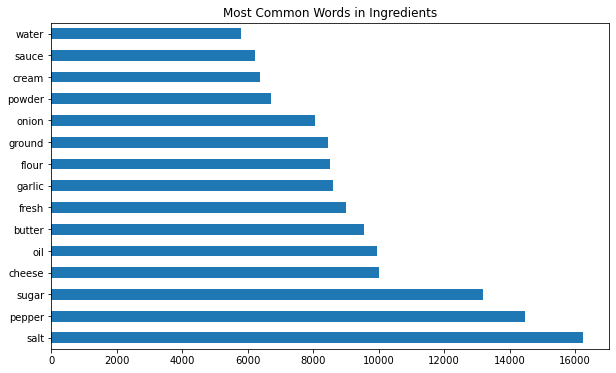

In [18]:
plt.figure(figsize=(10,6))
plt.title('Most Common Words in Ingredients')
df.sum().sort_values(ascending = False).head(15).plot(kind = 'barh')

<AxesSubplot:title={'center':'Least Common Words in Ingredients'}>

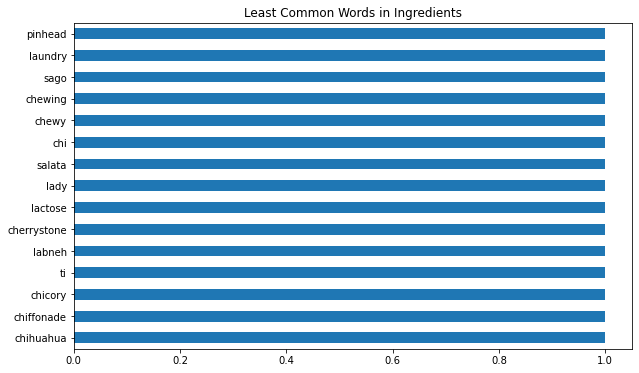

In [19]:
plt.figure(figsize=(10,6))
plt.title('Least Common Words in Ingredients')
df.sum().sort_values(ascending = False).tail(15).plot(kind = 'barh')

In [ ]:
get_rec_ing('a healthy apple and celery soup' , cosine_sim_ing)

In [21]:
get_rec_ing('bacon soup with veggies' , cosine_sim_ing)

,18129
name,basque style potatoes
minutes,25
description,pimento peppers and garlic make for a great potato side dish from the french-spanish border.thanks to nick of emazing for sharing this great recipe !
ingredients,"['olive oil', 'onion', 'garlic', 'parsley', 'pimiento', 'salt and pepper', 'potatoes', 'chicken broth']"
steps,"['heat the oil in a heavy skillet', 'add the onion and garlic', 'cook until soft', 'add the remaining ingredients and stir', 'cover and simmer for 20 minutes or until the potatoes are soft']"
